# Notebook 06 – UMAP Visualization

**Author:** Demetrios Agourakis  
**ORCID:** [0000-0002-8596-5097](https://orcid.org/0000-0002-8596-5097)  
**License:** MIT License  
**Code DOI:** [10.5281/zenodo.16752238](https://doi.org/10.5281/zenodo.16752238)  
**Data DOI:** [10.17605/OSF.IO/2AQP7](https://doi.org/10.17605/OSF.IO/2AQP7)  
**Version:** 1.0 – Last updated: 2025-08-07

This notebook projects symbolic embeddings into 2D space using UMAP, applies the previously determined optimal clustering, and visualizes the results.


In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
from pathlib import Path

SEED = 42


def get_root_path():
    current = Path.cwd()
    while current != current.parent:
        if (current / "README.md").exists():
            return current
        current = current.parent
    return Path.cwd()


ROOT = get_root_path()
DATA = ROOT / "data"
RESULTS = ROOT / "results"
DATA.mkdir(exist_ok=True)
RESULTS.mkdir(exist_ok=True)

merged_path = DATA / "symbolic_metrics_embeddings.csv"
clusters_meta_path = DATA / "optimal_clusters.json"
labels_path = DATA / "labels.csv"

if not merged_path.exists():
    raise FileNotFoundError(f"Missing merged dataset: {merged_path}")
if not clusters_meta_path.exists():
    raise FileNotFoundError(f"Missing optimal_clusters.json: {clusters_meta_path}")
if not labels_path.exists():
    raise FileNotFoundError(f"Missing labels.csv: {labels_path}")

df = pd.read_csv(merged_path)
with open(clusters_meta_path, "r") as f:
    clusters_meta = json.load(f)
labels_df = pd.read_csv(labels_path)

print(
    f"Loaded dataset: {df.shape}, labels: {labels_df.shape}, optimal k={clusters_meta['n_clusters']}"
)

/Users/demetriosagourakis/Library/Mobile Documents/com~apple~CloudDocs/Biologia Fractal/entropic-symbolic-society/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/demetriosagourakis/Library/Mobile Documents/com~apple~CloudDocs/Biologia Fractal/entropic-symbolic-society/.venv/lib/python3.11/site-packages/umap/__init__.py:36: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


Loaded dataset: (77163, 139), labels: (77163, 2), optimal k=18


In [2]:
# Identify embedding columns
emb_cols = [c for c in df.columns if c.startswith("emb_")]
if len(emb_cols) == 0:
    raise RuntimeError(
        "No embedding columns found. Expected columns starting with 'emb_'."
    )

X = df[emb_cols].values
print(f"Embedding matrix shape: {X.shape}")

# Align labels
df = pd.merge(df, labels_df, on="node", how="left")
assert df["cluster"].isna().sum() == 0, "Some nodes have missing cluster labels."

Embedding matrix shape: (77163, 128)


In [3]:
reducer = umap.UMAP(n_components=2, random_state=SEED, metric="cosine")
X_umap = reducer.fit_transform(X)
print(f"UMAP output shape: {X_umap.shape}")

# Save .npy version
umap_path = DATA / "X_umap.npy"
np.save(umap_path, X_umap)
print(f"UMAP coordinates saved to: {umap_path}")

# Create DataFrame
umap_df = pd.DataFrame(
    {
        "node": df["node"],
        "umap_x": X_umap[:, 0],
        "umap_y": X_umap[:, 1],
        "cluster": df["cluster"],
    }
)
umap_csv_path = DATA / "symbolic_umap_dataframe.csv"
umap_df.to_csv(umap_csv_path, index=False)
print(f"UMAP dataframe saved to: {umap_csv_path}")

/Users/demetriosagourakis/Library/Mobile Documents/com~apple~CloudDocs/Biologia Fractal/entropic-symbolic-society/.venv/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP output shape: (77163, 2)
UMAP coordinates saved to: /Users/demetriosagourakis/Library/Mobile Documents/com~apple~CloudDocs/Biologia Fractal/entropic-symbolic-society/NHB_Symbolic_Mainfold/data/X_umap.npy
UMAP dataframe saved to: /Users/demetriosagourakis/Library/Mobile Documents/com~apple~CloudDocs/Biologia Fractal/entropic-symbolic-society/NHB_Symbolic_Mainfold/data/symbolic_umap_dataframe.csv


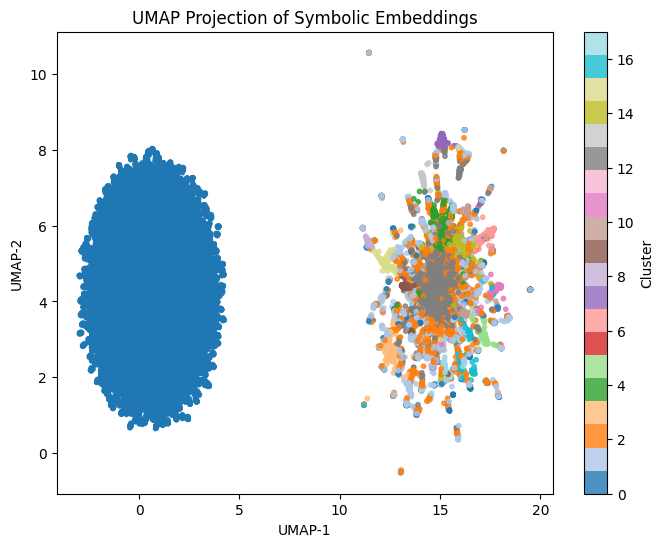

UMAP plot saved to: /Users/demetriosagourakis/Library/Mobile Documents/com~apple~CloudDocs/Biologia Fractal/entropic-symbolic-society/NHB_Symbolic_Mainfold/results/umap_projection.png


In [4]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    umap_df["umap_x"],
    umap_df["umap_y"],
    c=umap_df["cluster"],
    cmap="tab20",
    s=10,
    alpha=0.8,
)
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.title("UMAP Projection of Symbolic Embeddings")
plt.colorbar(scatter, label="Cluster")
plot_path = RESULTS / "umap_projection.png"
plt.savefig(plot_path, dpi=300, bbox_inches="tight")
plt.show()
print(f"UMAP plot saved to: {plot_path}")

## ✅ Notebook Summary

We projected symbolic embeddings into 2D space using UMAP and visualized clusters determined in the previous notebook.  
Artifacts saved:
- `data/X_umap.npy` — raw UMAP coordinates
- `data/symbolic_umap_dataframe.csv` — coordinates with node IDs and cluster labels
- `results/umap_projection.png` — static plot of the projection

This concludes the core analytical pipeline (Notebooks 01–06).
